In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
from pylab import rcParams
import statsmodels as sm
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression

In [3]:
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [5]:
test=pd.read_csv("data/test.csv",parse_dates=['dt'],index_col="dt")
train=pd.read_csv("data/train.csv",parse_dates=['dt'],index_col="dt")

In [5]:
train.head()

,Цена на арматуру
dt,
2015-01-05,32900
2015-01-12,32500
2015-01-19,32000
2015-01-26,30700
2015-02-02,30300


In [6]:
train.describe()

,Цена на арматуру
count,400.000000
mean,39229.475000
std,13407.979668
min,21000.000000
25%,31075.000000
50%,35450.000000
75%,42000.000000
max,79000.000000


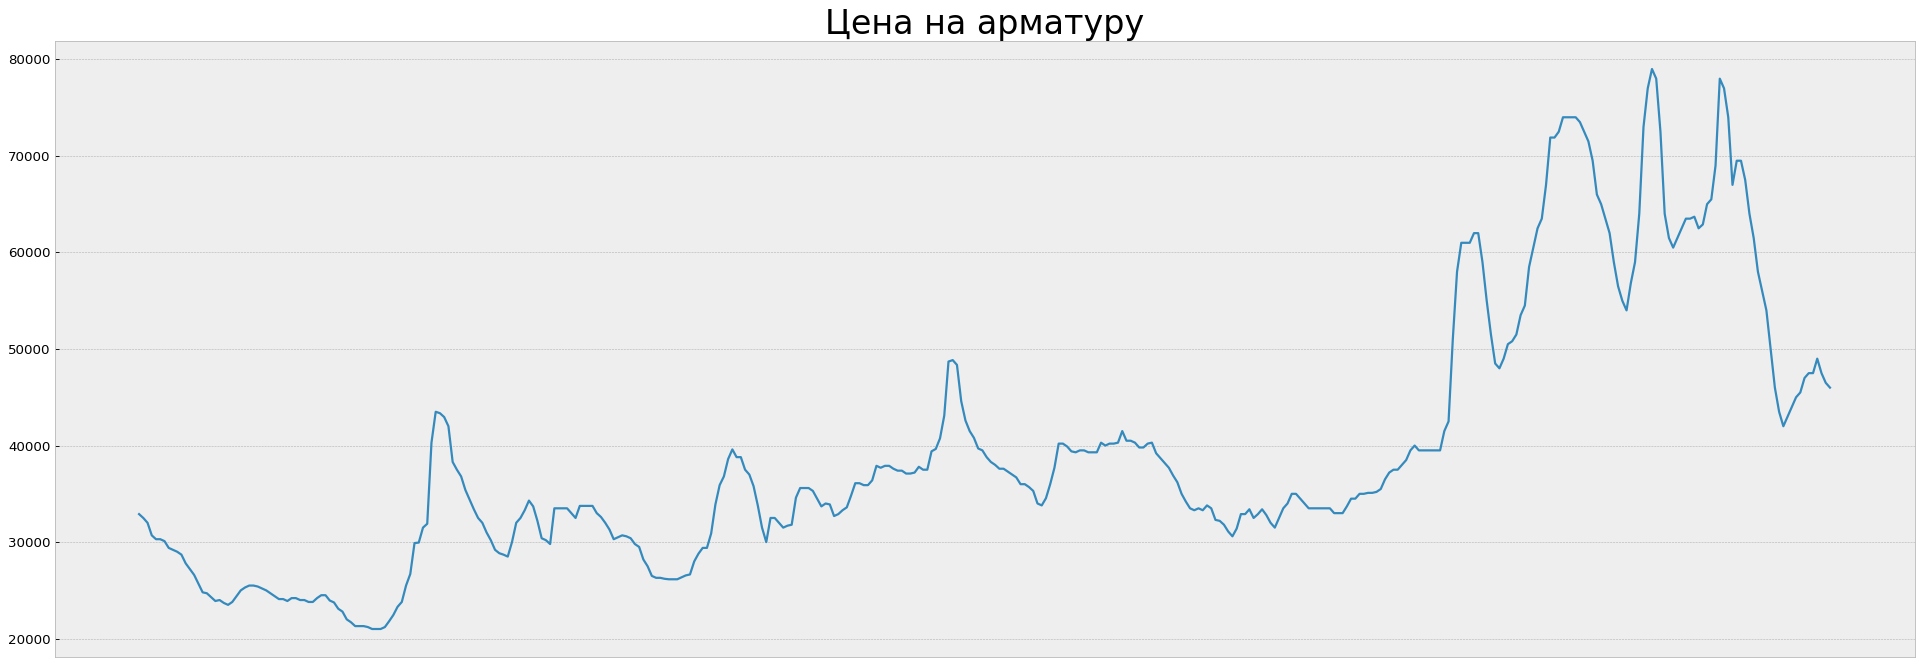

In [7]:
plt.figure(figsize=(30, 10), dpi=80)
plt.xticks([],[],)
plt.title("Цена на арматуру", fontsize=30)
plt.plot(train["Цена на арматуру"])

<Figure size 4000x1600 with 0 Axes>

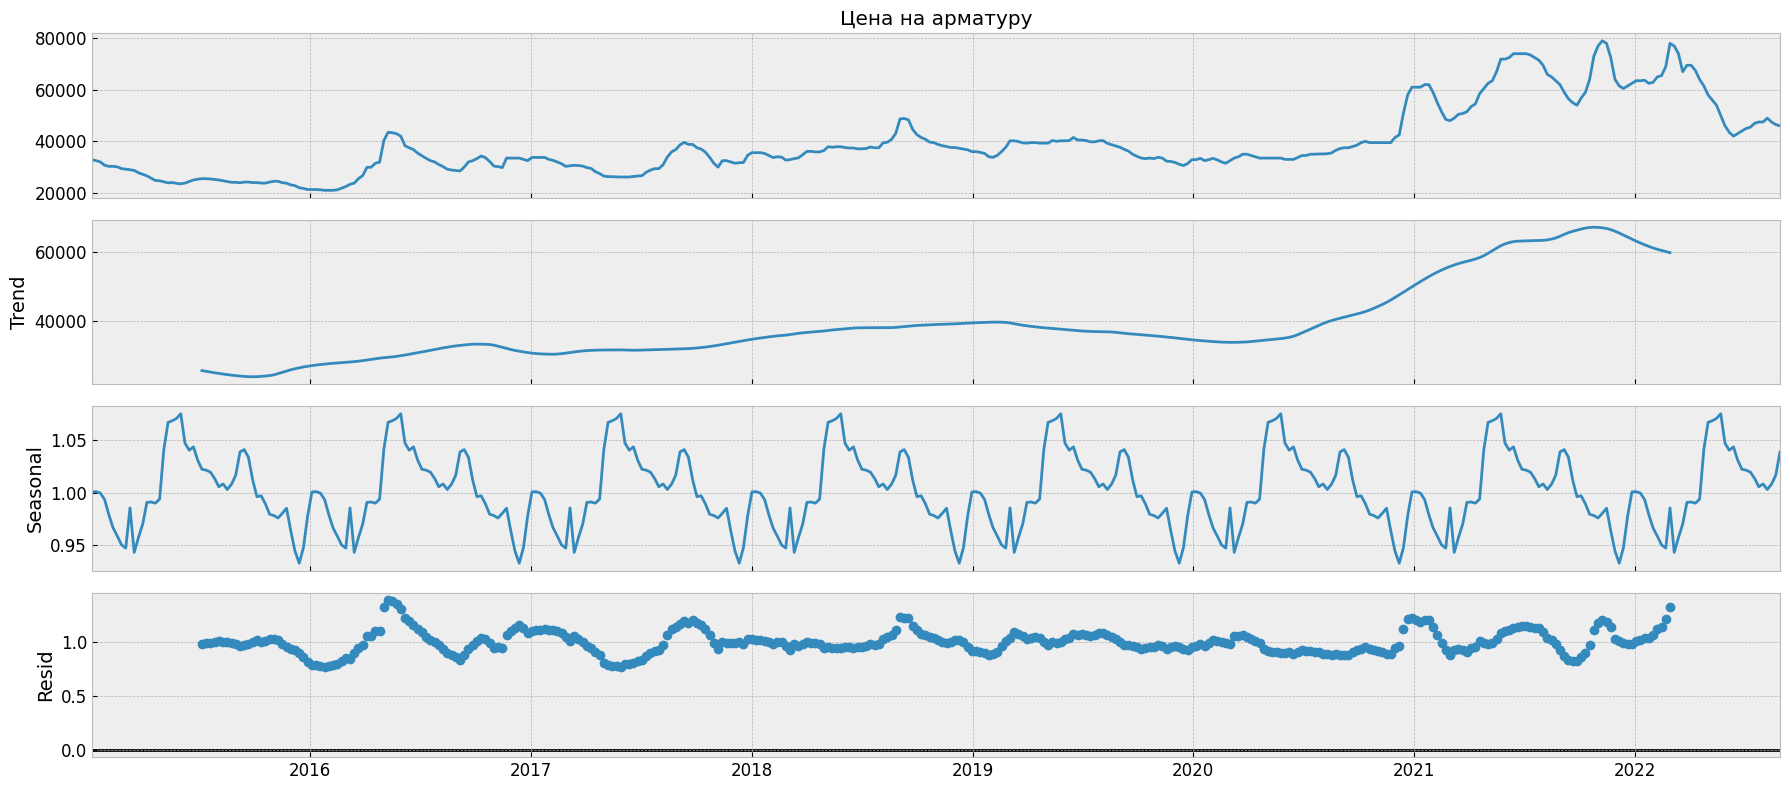

In [6]:
rcParams["figure.figsize"]=18,8
plt.figure(figsize=(50,20),dpi=80)
series=train["Цена на арматуру"]
result=seasonal_decompose(series,model='multiplicative')
result.plot();

Тренд

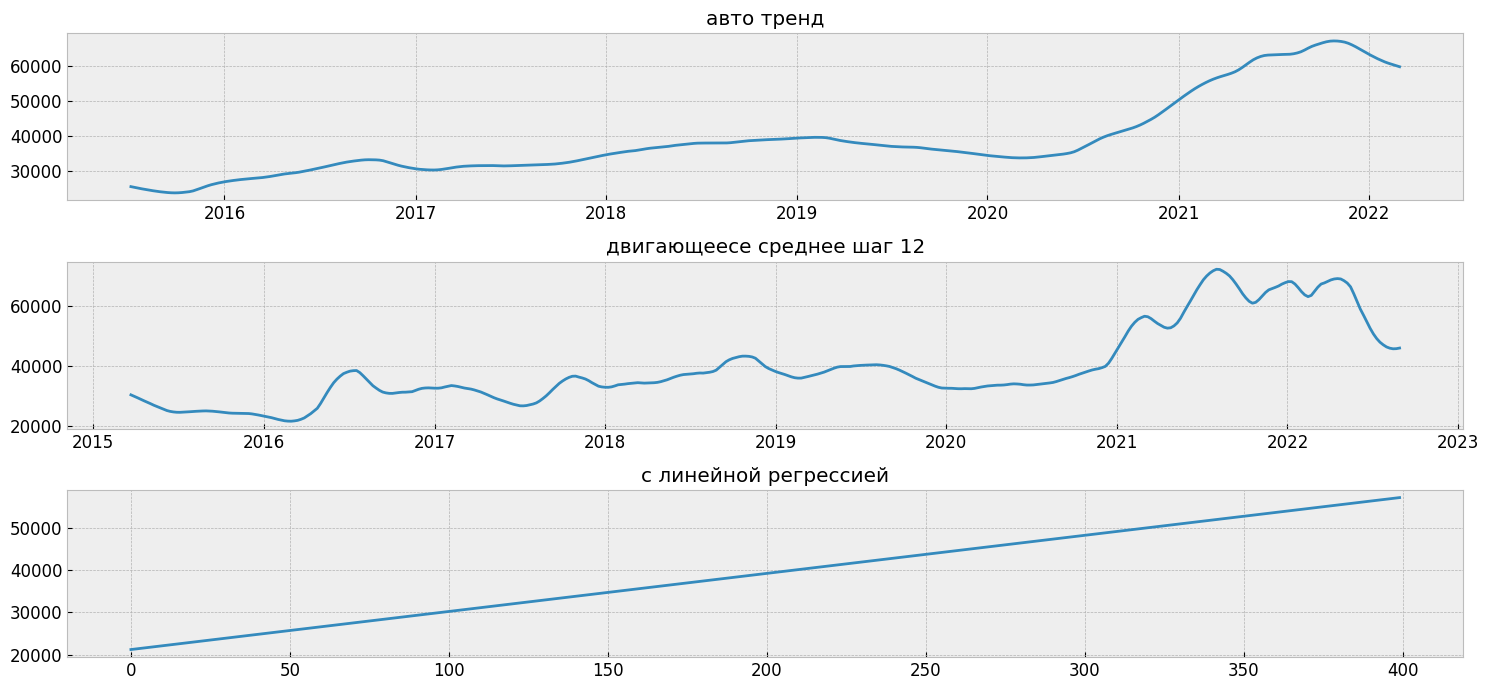

In [9]:
fig=plt.figure(figsize=(15,7))
layout=(3,2)
pm_ax=plt.subplot2grid(layout,(0,0),colspan=2)
mv_ax=plt.subplot2grid(layout,(1,0),colspan=2)
fit_ax=plt.subplot2grid(layout,(2,0),colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("авто тренд")

mm=train["Цена на арматуру"].rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("двигающеесе среднее шаг 12")

X=[i for i in range(0,len(train["Цена на арматуру"]))]
X=np.reshape(X,(len(X),1))
y=train["Цена на арматуру"].values
model=LinearRegression()
model.fit(X,y)
# считаем тренд
trend=model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("с линейной регрессией")

plt.tight_layout()

Сезонность

<Figure size 4000x1600 with 0 Axes>

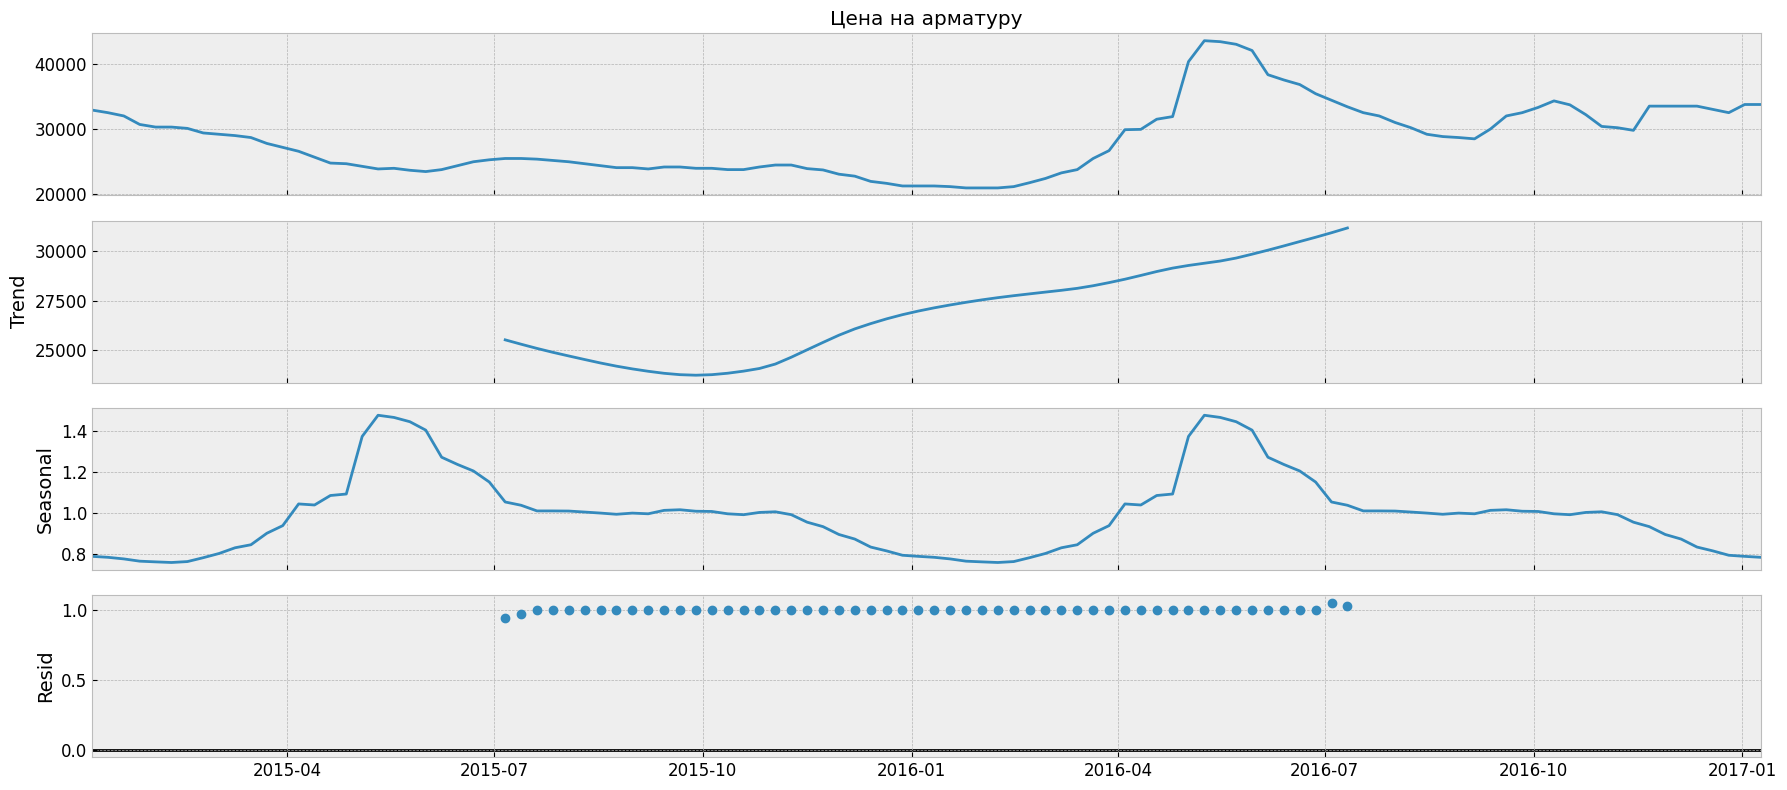

In [7]:
#с начала
rcParams["figure.figsize"]=18,8
plt.figure(figsize=(50,20),dpi=80)
series=train["Цена на арматуру"][:106]
result=seasonal_decompose(series,model='multiplicative')
result.plot();

<Figure size 4000x1600 with 0 Axes>

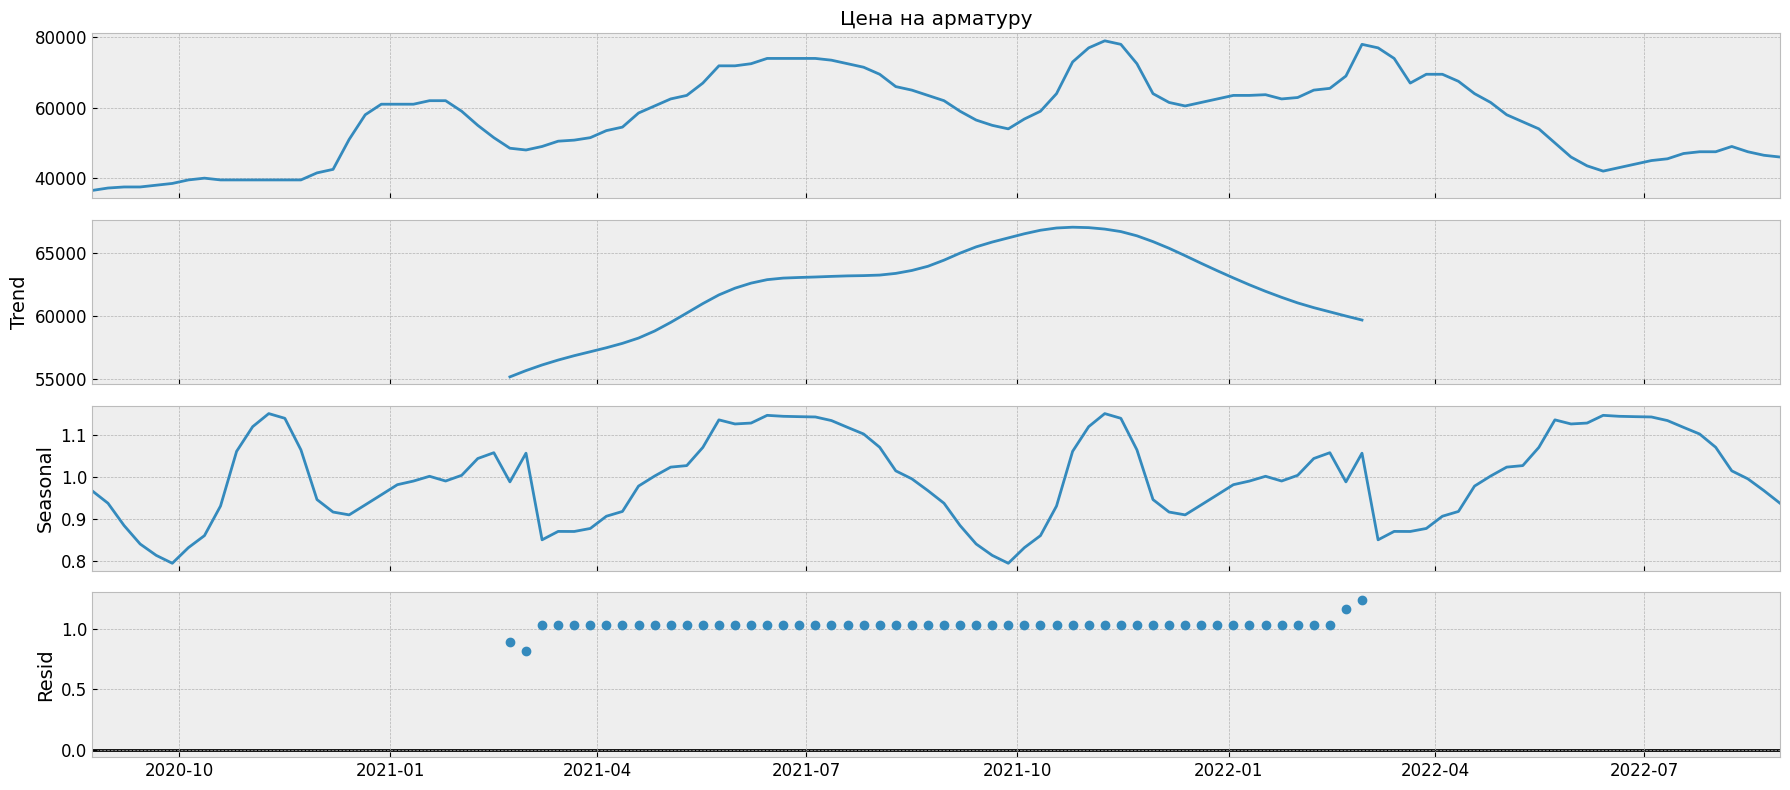

In [8]:
#с конца
rcParams["figure.figsize"]=18,8
plt.figure(figsize=(50,20),dpi=80)
series=train["Цена на арматуру"][-106:]
result=seasonal_decompose(series,model='multiplicative')
result.plot();

Шумы

Text(0.5, 1.0, 'среднее по времени')

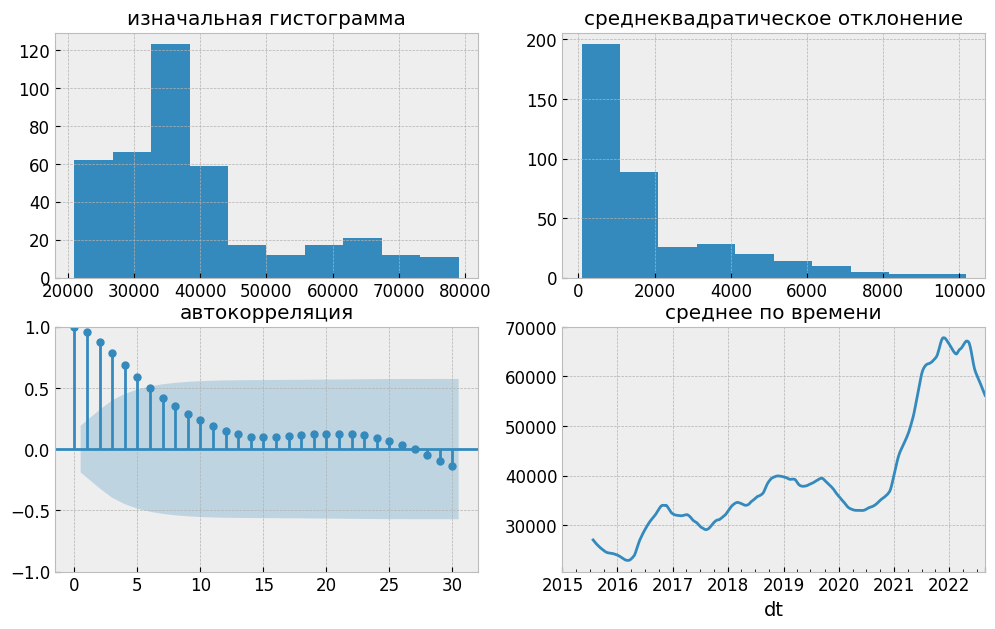

In [12]:
fig=plt.figure(figsize=(12,7))
layout=(2,2)
hist_ax=plt.subplot2grid(layout,(0,0))
ac_ax=plt.subplot2grid(layout,(1,0))
hist_std_ax=plt.subplot2grid(layout,(0,1))
mean_ax=plt.subplot2grid(layout,(1,1))

train["Цена на арматуру"].hist(ax=hist_ax)
hist_ax.set_title("изначальная гистограмма")

mm=train["Цена на арматуру"].rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("cреднеквадратическое отклонение")

plot_acf(series,lags=30,ax=ac_ax)
ac_ax.set_title("автокорреляция")

mm=train["Цена на арматуру"].rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("среднее по времени")

Автокорреляция полная и часть

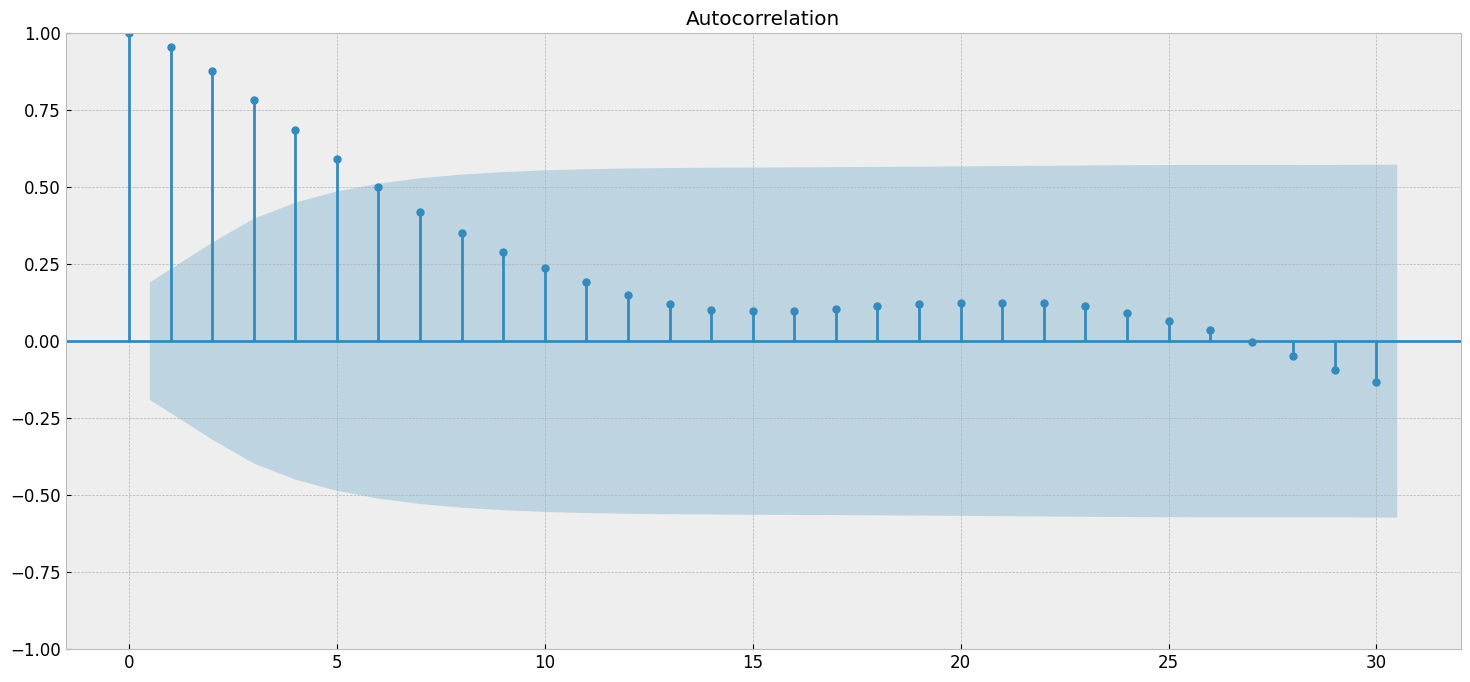

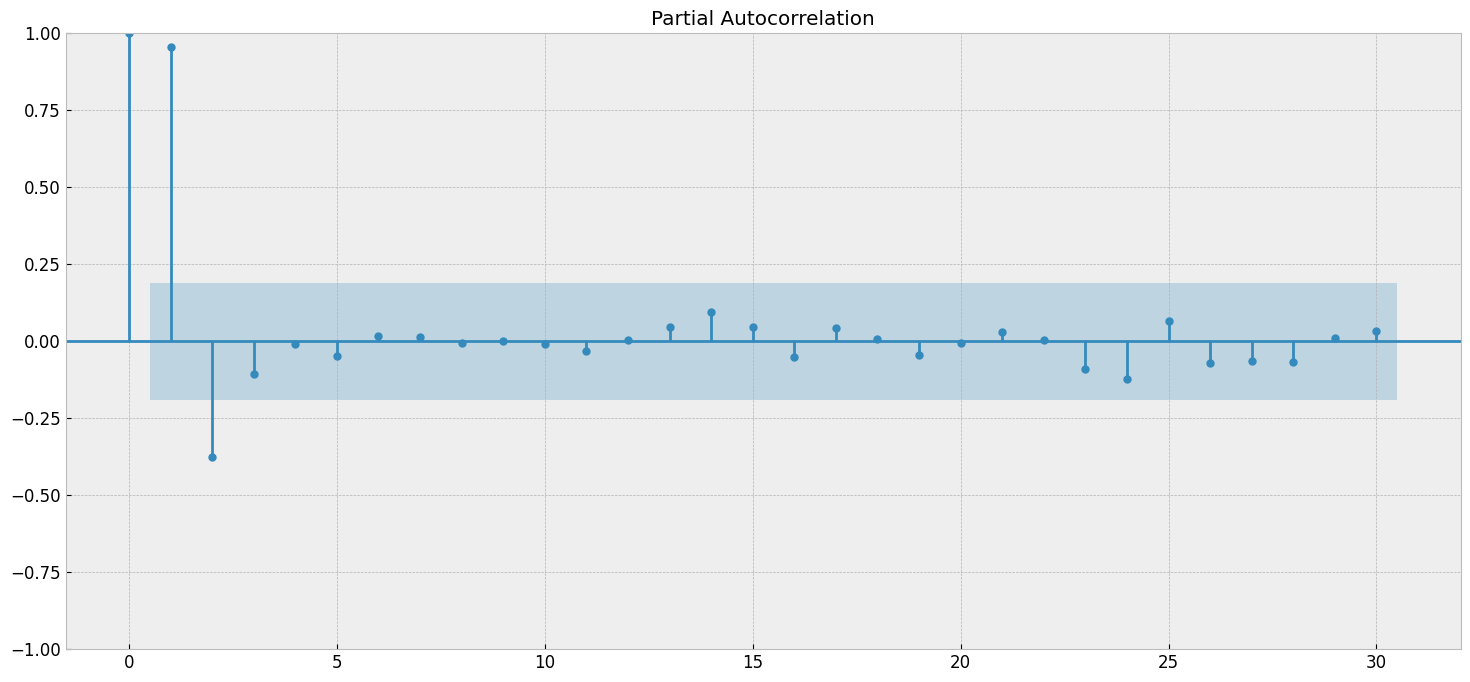

In [13]:
plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

Стационарность на глаз

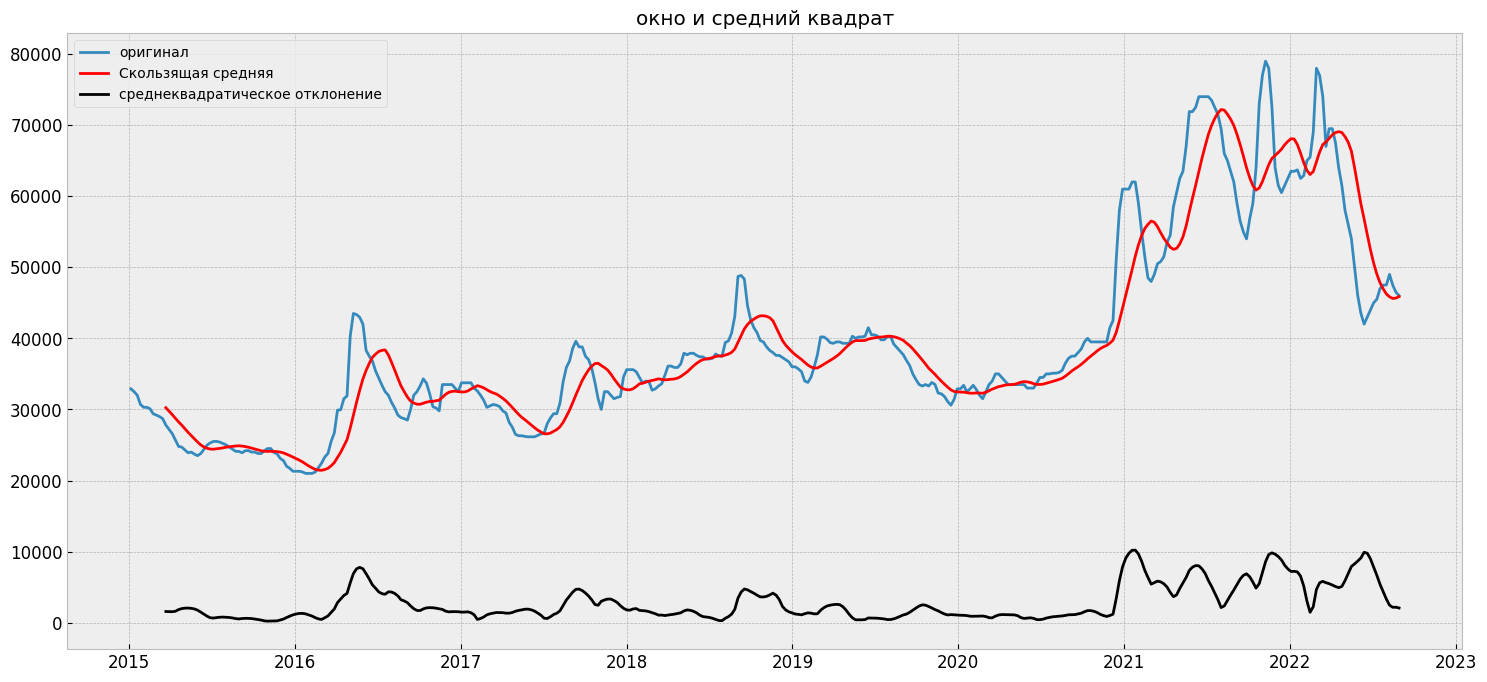

In [14]:
#стата
rolmean=train["Цена на арматуру"].rolling(window=12).mean()
rolstd=train["Цена на арматуру"].rolling(window=12).std()
#скользящие:
orig=plt.plot(train["Цена на арматуру"],label="оригинал")
mean=plt.plot(rolmean,color="red",label="Скользящая средняя")
std=plt.plot(rolstd,color="black",label="cреднеквадратическое отклонение")
plt.legend(loc="best")
plt.title("окно и средний квадрат")
plt.show(block=False)

Тест Дики-Фулера на стационарность

In [15]:
X=train["Цена на арматуру"].values
result=adfuller(X)
print("Тест Дики-Фулера: %f"%result[0])
print("значение p: %f"%result[1])
print("Крит значения:")
for key, value in result[4].items():
    print("\t%s: %.3f"%(key,value))  

Тест Дики-Фулера: -1.925870
значение p: 0.319991
Крит значения:
	1%: -3.447
	5%: -2.869
	10%: -2.571


Всё выше в одной функции

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle="bmh"):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style="bmh"):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        # mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "Точно не стационарно" if p_value <= 0.05 else "Не точно не стационарно"
        ts_ax.set_title("Дики-Фулер: p={0:.5f} Результат: {1}".format(p_value, hypothesis_result))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = train["Цена на арматуру"].rolling(window=12).mean()
        rolstd = train["Цена на арматуру"].rolling(window=12).std()
        #нарисовать скользящиe:
        orig = plt.plot(train["Цена на арматуру"], label="Оригинал")
        mean = plt.plot(rolmean, color="red", label="Скользящее ср")
        std = plt.plot(rolstd, color="black", label="СрКв Отклонение")
        plt.legend(loc="best")
        plt.title("Скользящее среднее и Среднеквадратное отклонение")

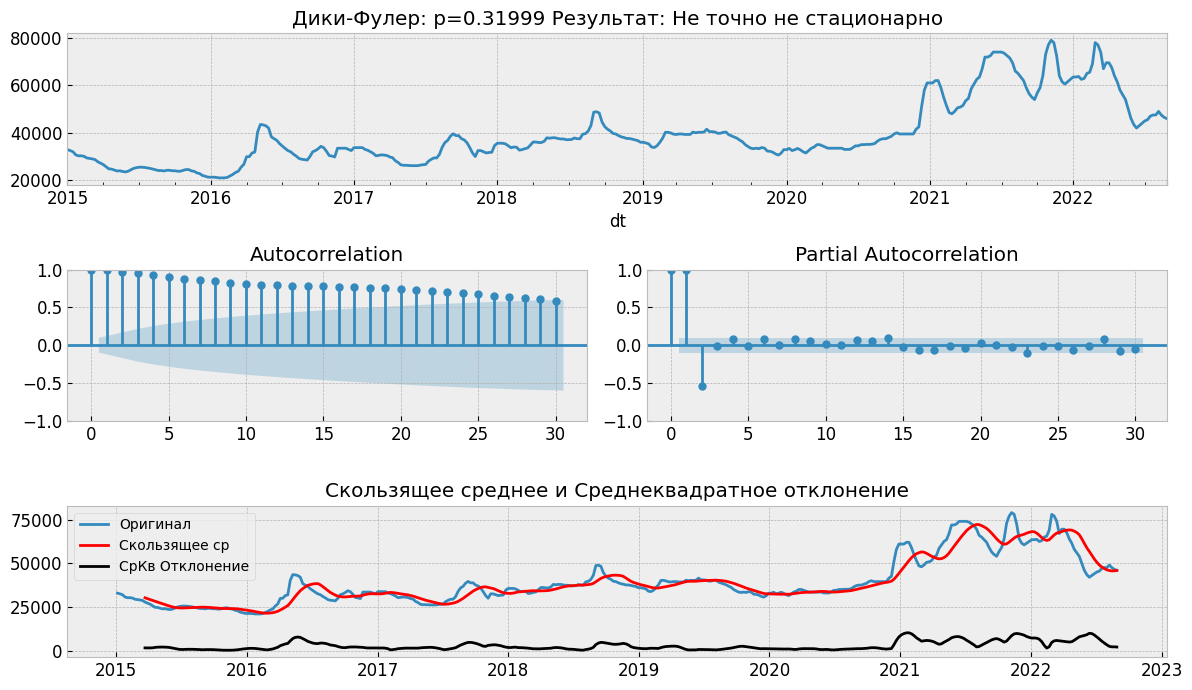

In [27]:
tsplot(train["Цена на арматуру"], lags=30)


Дифференцирование

In [29]:
def difference(dataset,interval=1,order=1):
    for _ in range(order):
        diff=list()
        for i in range(interval,len(dataset)):
            value=dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset=diff
    return diff

C:\Users\mesnevi\AppData\Local\Temp\ipykernel_26940\3486175697.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value=dataset[i] - dataset[i - interval]


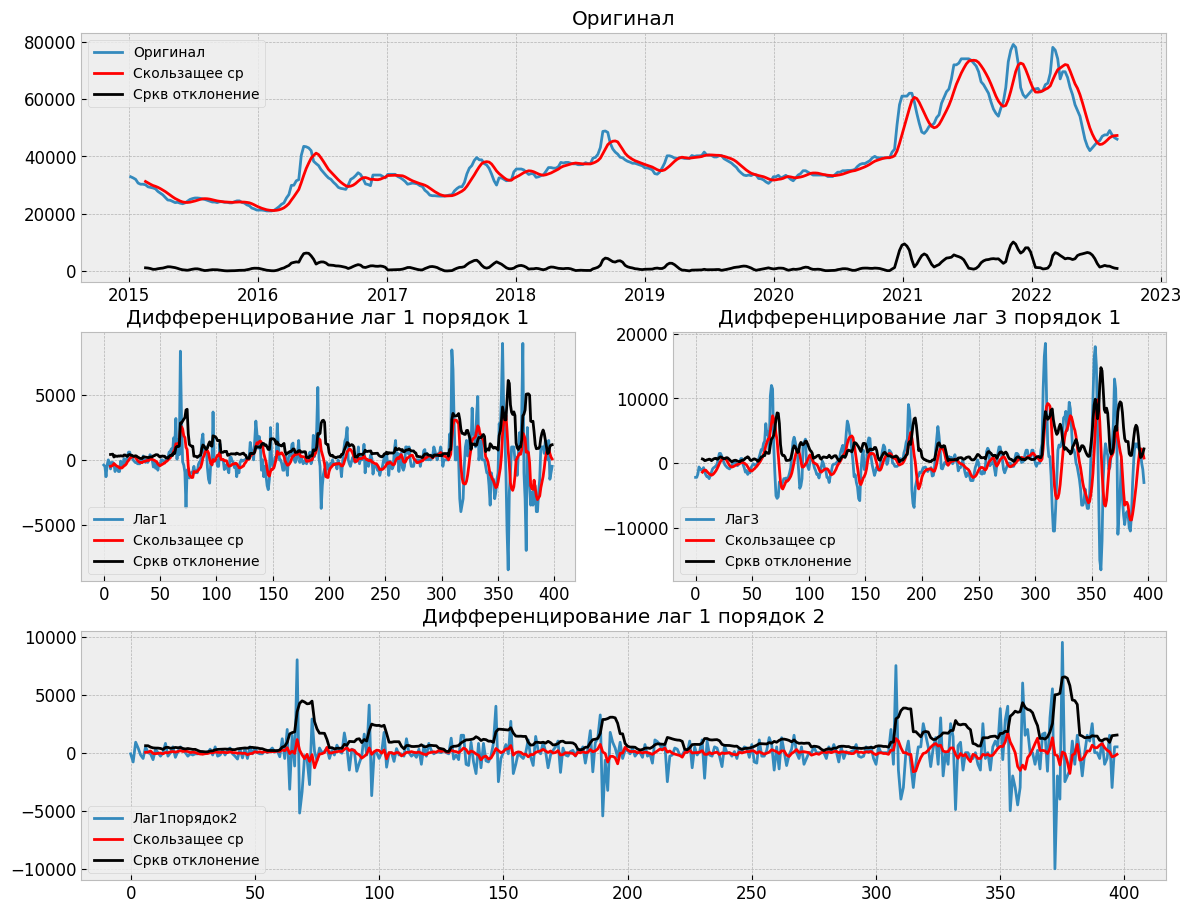

In [ ]:
lag1series=pd.Series(difference(train["Цена на арматуру"],interval=1,order=1))
lag3series=pd.Series(difference(train["Цена на арматуру"],interval=3,order=1))
lag1order2series=pd.Series(difference(
    train["Цена на арматуру"],interval=1,order=2))

fig=plt.figure(figsize=(14,11))
layout=(3,2)
original=plt.subplot2grid(layout,(0,0),colspan=2)
lag1=plt.subplot2grid(layout,(1,0))
lag3=plt.subplot2grid(layout,(1,1))
lag1order2=plt.subplot2grid(layout,(2,0),colspan=2)

original.set_title("Оригинал")
original.plot(train["Цена на арматуру"],label="Оригинал")
original.plot(train["Цена на арматуру"].rolling(
    7).mean(),color="red",label="Скользащее ср")
original.plot(train["Цена на арматуру"].rolling(7).std(),
              color="black",label="Сркв отклонение")
original.legend(loc="best")

lag1.set_title("Дифференцирование лаг 1 порядок 1")
lag1.plot(lag1series,label="Лаг1")
lag1.plot(lag1series.rolling(7).mean(),color="red",label="Скользащее ср")
lag1.plot(lag1series.rolling(7).std(),color="black",label="Сркв отклонение")
lag1.legend(loc="lower left")

lag3.set_title("Дифференцирование лаг 3 порядок 1")
lag3.plot(lag3series,label="Лаг3")
lag3.plot(lag3series.rolling(7).mean(),color="red",label="Скользащее ср")
lag3.plot(lag3series.rolling(7).std(),color="black",label="Сркв отклонение")
lag3.legend(loc="lower left")

lag1order2.set_title("Дифференцирование лаг 1 порядок 2")
lag1order2.plot(lag1order2series,label="Лаг1порядок2")
lag1order2.plot(lag1order2series.rolling(7).mean(),
                color="red",label="Скользащее ср")
lag1order2.plot(lag1order2series.rolling(7).std(),
                color="black",label="Сркв отклонение")
lag1order2.legend(loc="lower left")

Логарифмирование

Text(0.5, 1.0, 'Логарифмирование')

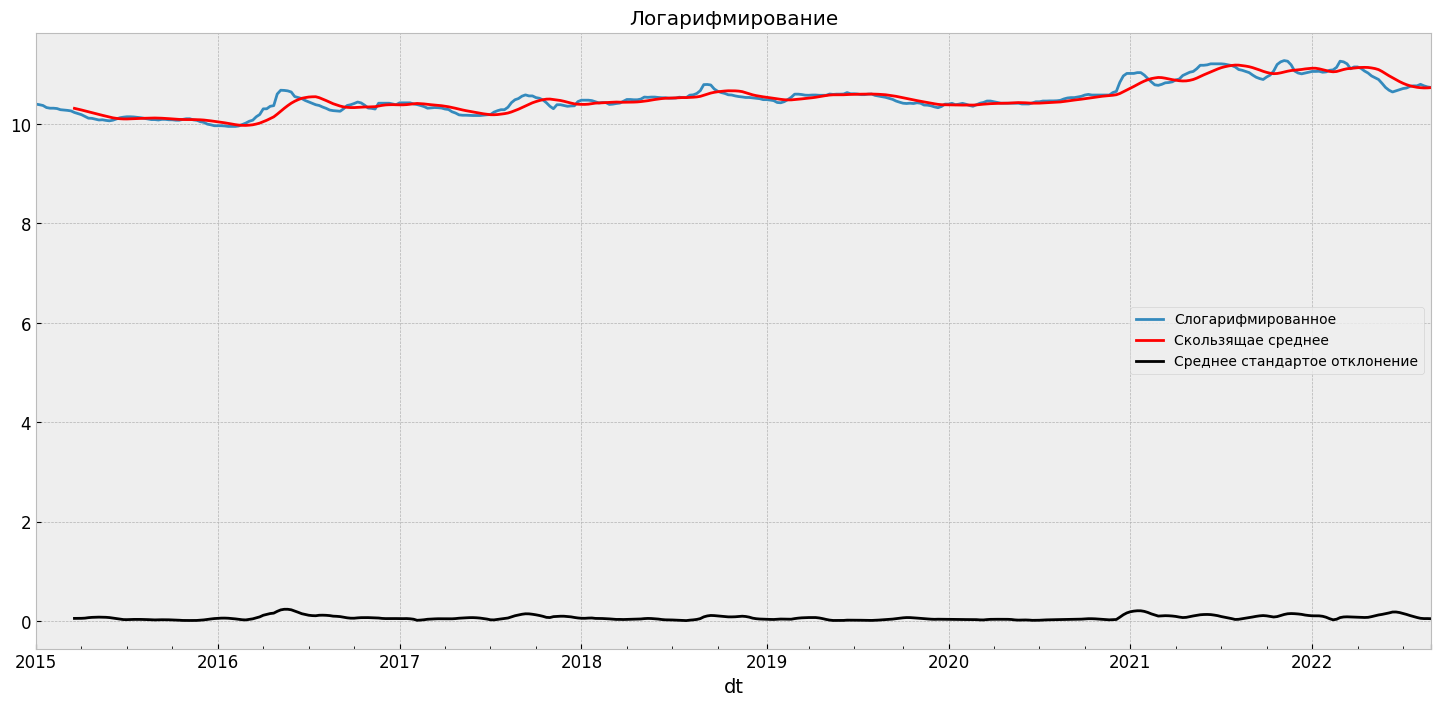

In [ ]:
ts_log=np.log(train["Цена на арматуру"])
ts_log.plot(label="Слогарифмированное")
ts_log.rolling(window=12).mean().plot(color="red",label="Скользящаe среднee")
ts_log.rolling(window=12).std().plot(color="black",label="Среднее стандартое отклонение")
plt.legend()
plt.title("Логарифмирование")

Сглаживание

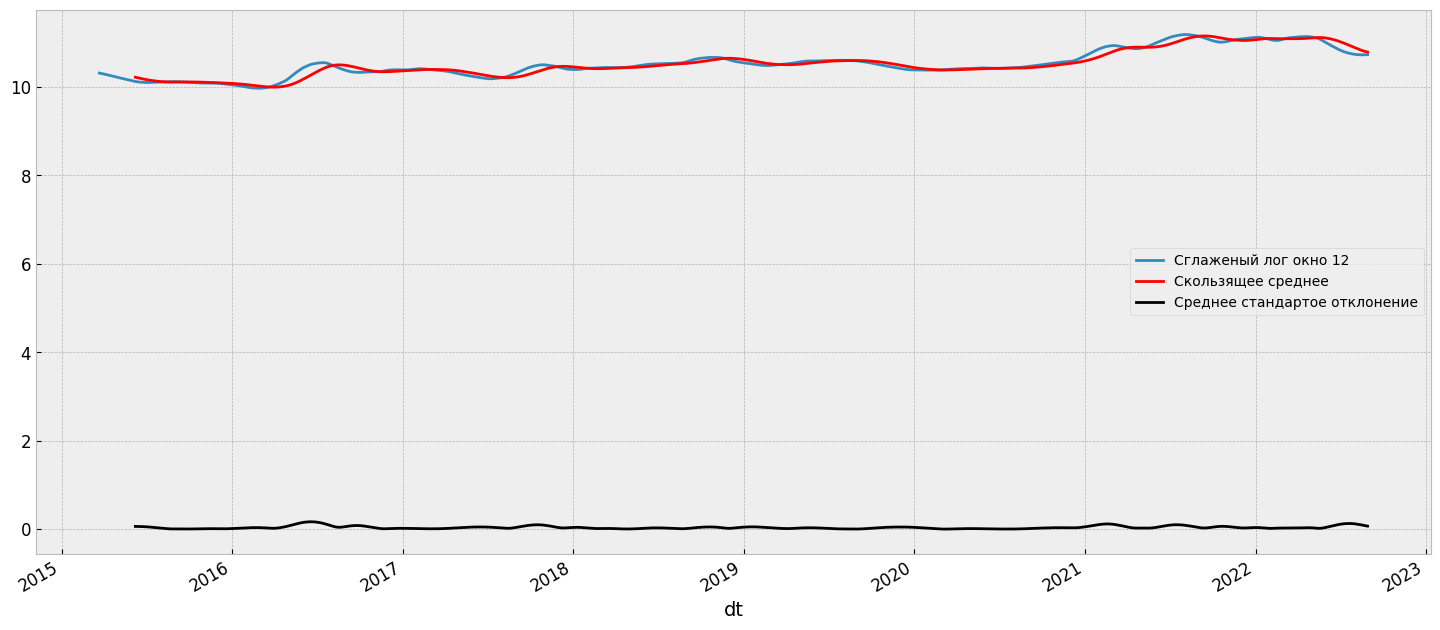

In [ ]:
avg=pd.Series(ts_log).rolling(12).mean()
plt.plot(avg,label="Сглаженное слогарифмированное окно 12")
avg.rolling(window=12).mean().plot(color="red",label="Скользящее среднее")
avg.rolling(window=12).std().plot(color="black",label="Среднее стандартое отклонение")
plt.legend()

Всё вместе

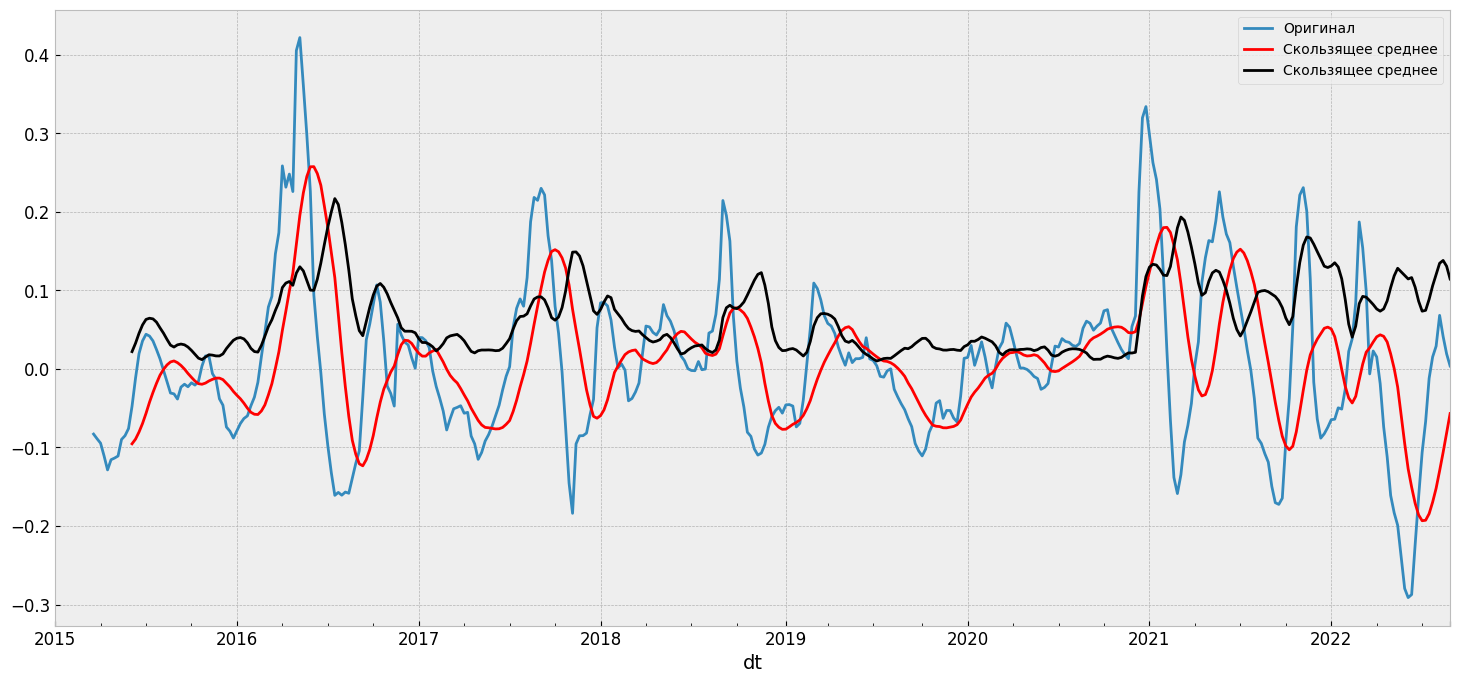

In [ ]:
ts_log_moving_avg_diff=ts_log-avg

ts_log_moving_avg_diff.plot(label="Оригинал")
ts_log_moving_avg_diff.rolling(12).mean().plot(
    color="red",label="Скользящее среднее")
ts_log_moving_avg_diff.rolling(12).std().plot(
    color="black",label="Скользящее среднее")
plt.legend(loc="best")
#!!!не работает(9((!!!#